In [29]:
from datetime import date, timedelta
from time import time

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import StrMethodFormatter

np.random.seed(42)
today = date.today()

f'{today:%Y-%m-%d}'

'2023-02-28'

## Fidelity Index US Fund

- [Fidelity Index US Fund](https://www.fidelity.co.uk/factsheet-data/factsheet/GB00BJS8SH10-fidelity-index-us-fund-p-acc/key-statistics)
- [Historical Prices](https://markets.ft.com/data/funds/tearsheet/historical?s=GB00BJS8SH10:GBX)

In [4]:
fidelity_fund = pd.read_csv('fidelity-index-us-fund.csv', parse_dates=['date'], index_col='date')

fidelity_fund.info()
fidelity_fund.head(2)
fidelity_fund.tail(2)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1051 entries, 2018-12-31 to 2023-02-27
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1051 non-null   float64
dtypes: float64(1)
memory usage: 16.4 KB


,close
date,
2018-12-31,193.08
2019-01-02,192.05


,close
date,
2023-02-24,346.86
2023-02-27,347.09


In [5]:
fidelity_fund.head(6)

,close
date,
2018-12-31,193.08
2019-01-02,192.05
2019-01-03,193.04
2019-01-04,192.88
2019-01-07,195.33
2019-01-08,197.93


In [24]:
# Invest £10,000 on Friday, 4th Jan 2019, on close

capital      = 10_000
unit_price   = 192.88  # As of 4th Jan 2019
units_bought = int(capital/unit_price)
cash         = capital - (unit_price * units_bought)

assert capital == (unit_price * units_bought) + cash

print(f'Bought {units_bought} units, value £{unit_price*units_bought:,.2f}. Cash remaining: £{cash:,.2f}')

Bought 51 units, value £9,836.88. Cash remaining: £163.12


In [25]:
fidelity_fund['equity'] = fidelity_fund['close'] * units_bought + cash

# The first week, 2018-12-31 - 2019-01-04 (incl), our equity is equal to the capital
fidelity_fund.loc[:'2019-01-04', 'equity'] = capital

fidelity_fund.head(6)

,close,equity
date,,
2018-12-31,193.08,10000.00
2019-01-02,192.05,10000.00
2019-01-03,193.04,10000.00
2019-01-04,192.88,10000.00
2019-01-07,195.33,10124.95
2019-01-08,197.93,10257.55


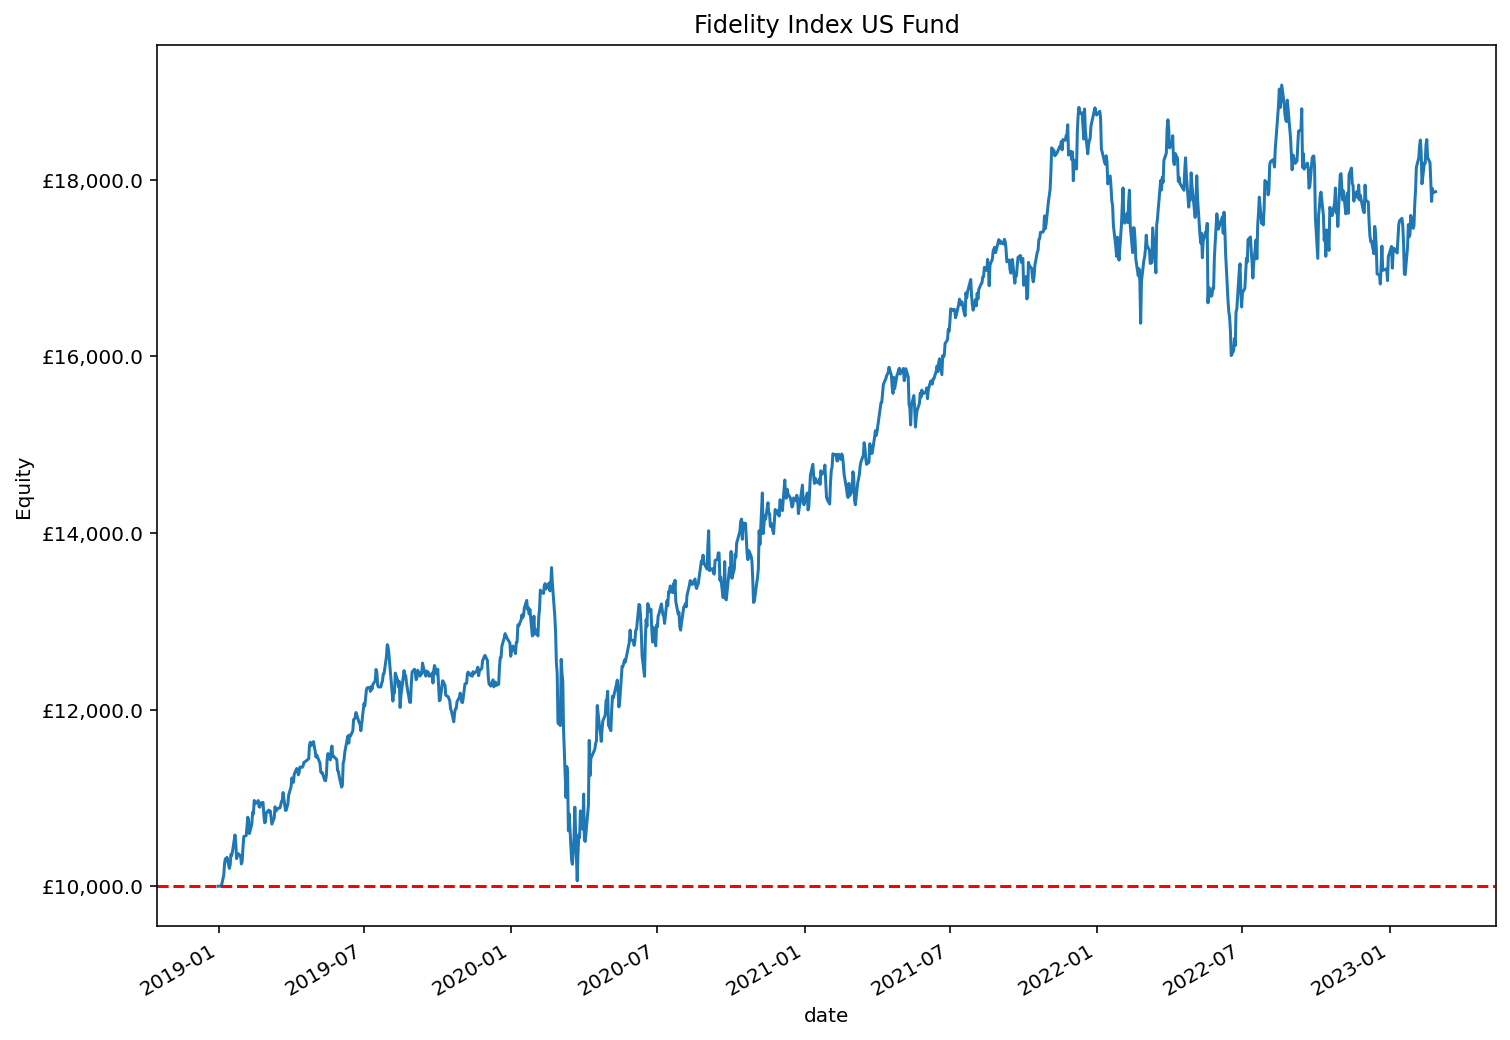

In [31]:
ax = fidelity_fund.equity.plot(figsize=(12, 9))
_  = ax.axhline(10_000, ls='--', c='red')
_  = ax.set_title('Fidelity Index US Fund')
_  = ax.set_ylabel('Equity')
_  = ax.yaxis.set_major_formatter(StrMethodFormatter('£{x:,}'))

## `$.SPX.D.Trend`

In [53]:
!head -n3 $.SPX.D.Trend.csv

Entry date,Exit date,Type,Nbr Bars,Abs Perf,Relat Perf(%),MFE,MAE
13 Jan 2019,14 Jan 2019,Long,1,-£61.60,-0.31%,£0.00,-£61.60
15 Jan 2019,10 May 2019,Long,98,"£2,178.04",0.1089,"£2,850.64",£0.00


In [52]:
spx_trend = pd.read_csv('$.SPX.D.Trend.csv', parse_dates=['Exit date'], usecols=[1, 4])
spx_trend = spx_trend.set_axis(['date', 'pnl'], axis=1).set_index('date')
spx_trend['pnl'] = spx_trend.pnl.str.replace('£', '').str.replace(',', '').astype(float)

spx_trend.info()
spx_trend.head(2)
spx_trend.tail(2)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38 entries, 2019-01-14 to 2019-10-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pnl     38 non-null     float64
dtypes: float64(1)
memory usage: 608.0 bytes


,pnl
date,
2019-01-14,-61.60
2019-05-10,2178.04


,pnl
date,
2022-12-16,-354.21
2019-10-02,40.32


## `$.SPX.6H.Cycle`

In [71]:
!head -n3 $.SPX.6H.Cycle.csv

Entry date,Exit date,Type,Nbr Bars,Abs Perf,Relat Perf(%),MFE,MAE
"21 Jan 2019, 05:00:00","25 Jan 2019, 17:00:00",Long,18,£12.75,0.0006,£15.00,-£358.50
"18 Feb 2019, 05:00:00","22 Feb 2019, 17:00:00",Long,18,£95.04,0.0048,£127.44,-£41.04


In [72]:
spx_cycle = pd.read_csv('$.SPX.6H.Cycle.csv', parse_dates=['Exit date'], usecols=[1, 4])
spx_cycle = spx_cycle.set_axis(['date', 'pnl'], axis=1).set_index('date')
spx_cycle['pnl'] = spx_cycle.pnl.str.replace('£', '').str.replace(',', '').astype(float)

spx_cycle.info()
spx_cycle.head(2)
spx_cycle.tail(2)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2019-01-25 17:00:00 to 2022-12-12 17:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pnl     35 non-null     float64
dtypes: float64(1)
memory usage: 560.0 bytes


,pnl
date,
2019-01-25 17:00:00,12.75
2019-02-22 17:00:00,95.04


,pnl
date,
2022-11-11 17:00:00,1031.73
2022-12-12 17:00:00,-238.42


In [77]:
spx = (spx_trend.merge(spx_cycle, how='outer', left_index=True, right_index=True)
       .set_axis(['trend', 'cycle'], axis=1)
       .fillna(0))

spx['trend+cycle'] = spx.trend + spx.cycle

spx.head(2)
spx.tail(2)

,trend,cycle,trend+cycle
date,,,
2019-01-14 00:00:00,-61.6,0.00,-61.60
2019-01-25 17:00:00,0.0,12.75,12.75


,trend,cycle,trend+cycle
date,,,
2022-12-12 17:00:00,0.00,-238.42,-238.42
2022-12-16 00:00:00,-354.21,0.00,-354.21


## Merge everything together

In [83]:
df = fidelity_fund.merge(spx, how='outer', left_index=True, right_index=True)
df['equity'] = df.equity.fillna(method='backfill')
df           = df.fillna(0)

df.info()
df.head(2)
df.tail(2)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2018-12-31 00:00:00 to 2023-02-27 00:00:00
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close        1096 non-null   float64
 1   equity       1096 non-null   float64
 2   trend        1096 non-null   float64
 3   cycle        1096 non-null   float64
 4   trend+cycle  1096 non-null   float64
dtypes: float64(5)
memory usage: 51.4 KB


,close,equity,trend,cycle,trend+cycle
date,,,,,
2018-12-31,193.08,10000.0,0.0,0.0,0.0
2019-01-02,192.05,10000.0,0.0,0.0,0.0


,close,equity,trend,cycle,trend+cycle
date,,,,,
2023-02-24,346.86,17852.98,0.0,0.0,0.0
2023-02-27,347.09,17864.71,0.0,0.0,0.0


In [84]:
for col in ['trend', 'cycle', 'trend+cycle']:
    df[f'{col}_eq'] = df[col].cumsum() + capital

df = df[['equity', 'trend_eq', 'cycle_eq', 'trend+cycle_eq']]
df.head(2)
df.tail(2)

,equity,trend_eq,cycle_eq,trend+cycle_eq
date,,,,
2018-12-31,10000.0,10000.0,10000.0,10000.0
2019-01-02,10000.0,10000.0,10000.0,10000.0


,equity,trend_eq,cycle_eq,trend+cycle_eq
date,,,,
2023-02-24,17852.98,24744.96,18722.6,33467.56
2023-02-27,17864.71,24744.96,18722.6,33467.56


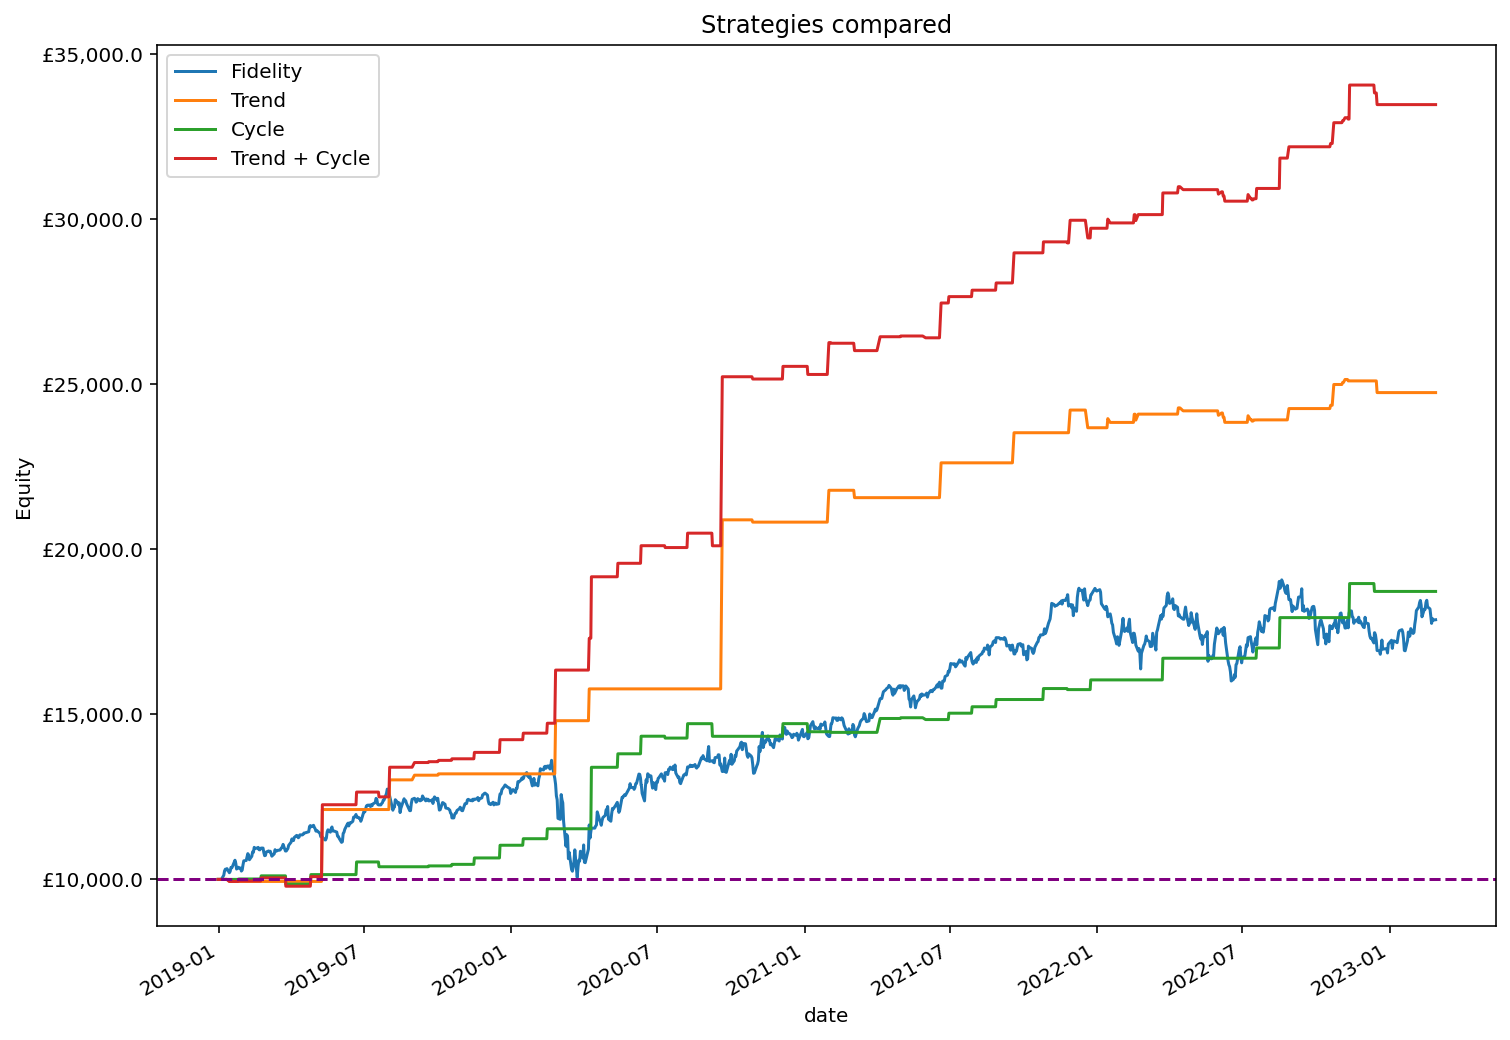

In [95]:
ax = df.plot(figsize=(12, 9))
_  = ax.legend(labels=['Fidelity', 'Trend', 'Cycle', 'Trend + Cycle'])
_  = ax.axhline(10_000, ls='--', c='purple')
_  = ax.set_title('Strategies compared')
_  = ax.set_ylabel('Equity')
_  = ax.yaxis.set_major_formatter(StrMethodFormatter('£{x:,}'))